In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df = pd.read_excel("Superstore.xls")
tech = df.loc[df['Category'] == 'Technology']

In [5]:
tech['Order Date'].min(), tech['Order Date'].max()

(Timestamp('2017-01-06 00:00:00'), Timestamp('2020-12-30 00:00:00'))

In [6]:
cols = ['Row ID', 'Order ID', 'Ship Date old', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
tech.drop(cols, axis=1, inplace=True)
tech = tech.sort_values('Order Date')
tech.isnull().sum()

Order Date old    0
Sales             0
Unnamed: 21       0
Unnamed: 22       0
Order Date        0
Ship Date         0
dtype: int64

In [7]:
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()

In [8]:
tech = tech.set_index('Order Date')
tech.index

DatetimeIndex(['2017-01-06', '2017-01-09', '2017-01-13', '2017-01-15',
               '2017-01-16', '2017-01-20', '2017-01-26', '2017-02-01',
               '2017-02-02', '2017-02-06',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [9]:
y = tech['Sales'].resample('MS').mean()


In [10]:
y['2017':]

Order Date
2017-01-01     449.041429
2017-02-01     229.787143
2017-03-01    2031.948375
2017-04-01     613.028933
2017-05-01     564.698588
2017-06-01     766.905909
2017-07-01     533.608933
2017-08-01     708.435385
2017-09-01    2035.838133
2017-10-01     596.900900
2017-11-01    1208.056320
2017-12-01    1160.732889
2018-01-01     925.070800
2018-02-01     431.121250
2018-03-01     574.662333
2018-04-01     697.559500
2018-05-01     831.642857
2018-06-01     429.024400
2018-07-01     691.397733
2018-08-01    1108.902286
2018-09-01     950.856400
2018-10-01     594.716111
2018-11-01    1037.982652
2018-12-01    1619.637636
2019-01-01     374.671067
2019-02-01    1225.891400
2019-03-01    1135.150105
2019-04-01     875.911882
2019-05-01    1601.816167
2019-06-01    1023.259500
2019-07-01     829.312500
2019-08-01     483.620100
2019-09-01    1144.170300
2019-10-01    1970.835875
2019-11-01    1085.642360
2019-12-01     970.554870
2020-01-01    1195.218071
2020-02-01     430.501714
2

In [ ]:
y['2016':]

Order Date
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

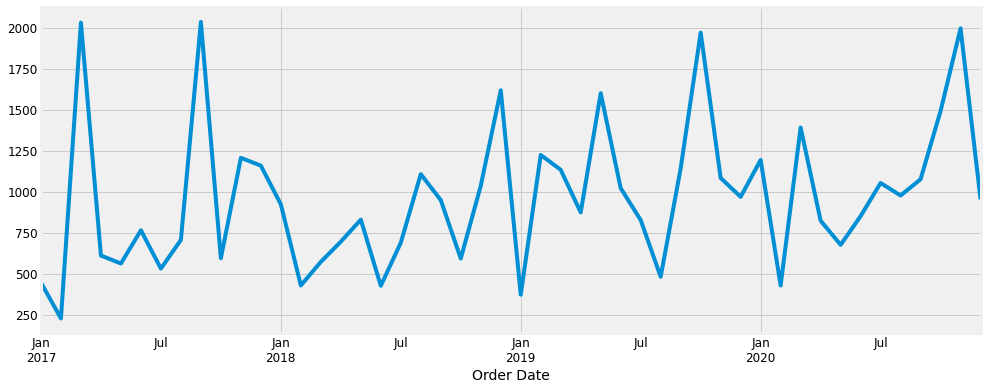

In [11]:
y.plot(figsize=(15, 6))
plt.show()

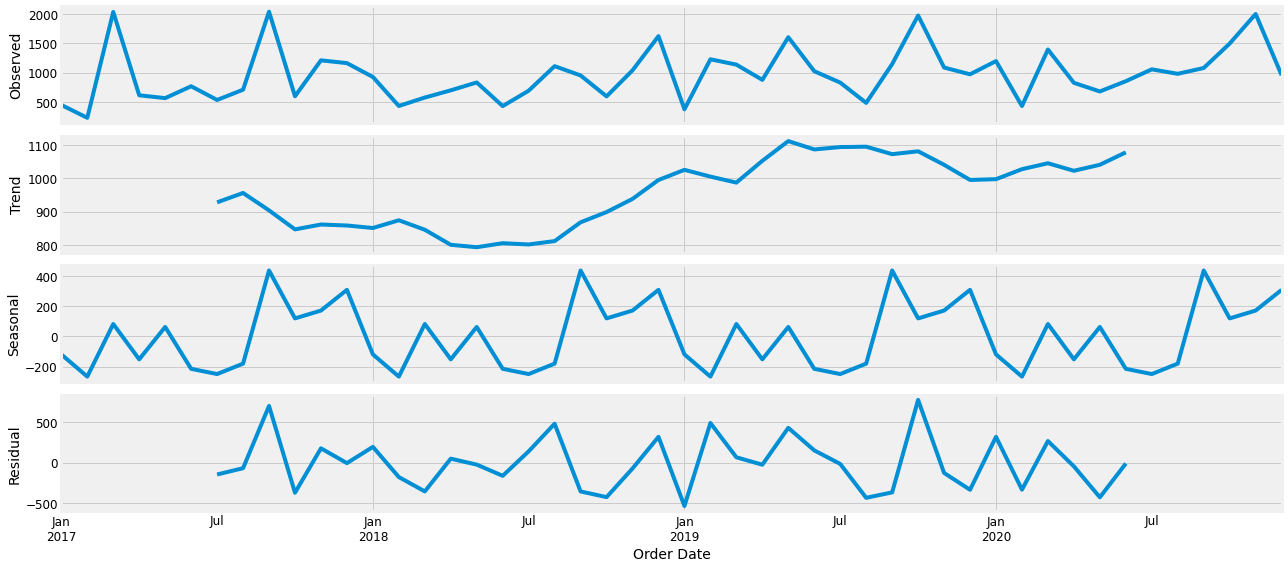

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05


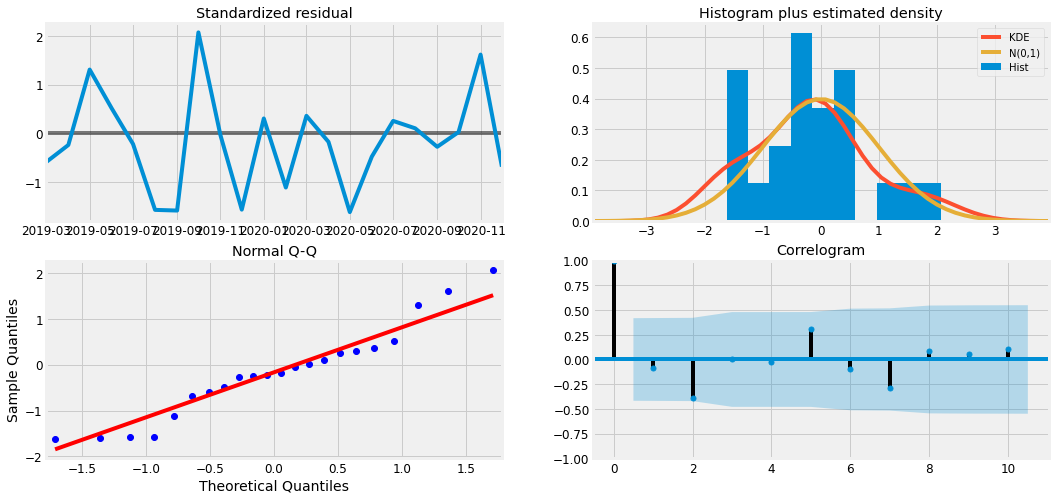

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

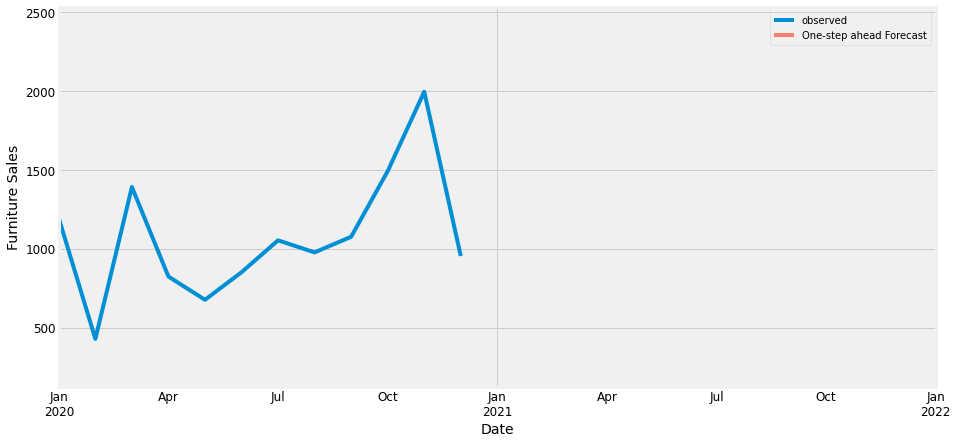

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [24]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 150095.64


In [25]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 387.42


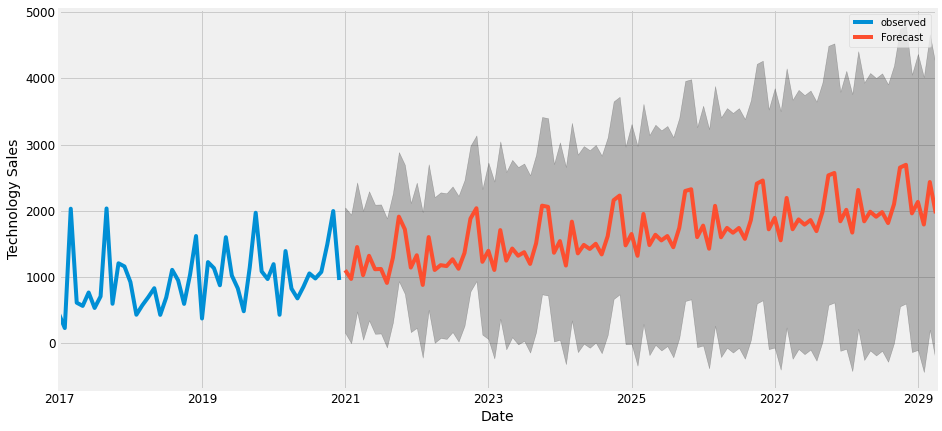

In [36]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

In [31]:
tech = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
tech.shape, office.shape

((1847, 25), (6026, 25))

In [33]:
cols = ['Row ID', 'Order ID', 'Ship Date old', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
tech.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
tech = tech.sort_values('Order Date')
office = office.sort_values('Order Date')
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
tech = tech.set_index('Order Date')
office = office.set_index('Order Date')
y_tech = tech['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
tech = pd.DataFrame({'Order Date':y_tech.index, 'Sales':y_tech.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = tech.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'tech_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,tech_sales,office_sales
0,2017-01-01,449.041429,285.357647
1,2017-02-01,229.787143,63.042588
2,2017-03-01,2031.948375,391.176318
3,2017-04-01,613.028933,464.794750
4,2017-05-01,564.698588,324.346545
